In [2]:

!pip install fuzzy-c-means


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.15.2
    Uninstalling typer-0.15.2:
      Successfully uninstalled typer-0.15.2
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.38.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [3]:
from fcmeans import FCM # Now import

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from scipy import stats
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("/content/IRIS (2).csv")

In [5]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = data[features]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
k_values = range(2, 10)  # Test k values from 2 to 9
silhouette_scores = []


In [8]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (based on silhouette score for KMeans): {optimal_k}")



Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d025e336700>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e

Optimal number of clusters (based on silhouette score for KMeans): 2


In [9]:
fcm = FCM(n_clusters=optimal_k) # Using the same optimal k found for KMeans
fcm.fit(X_scaled)



In [10]:
data['cluster_fcm'] = fcm.predict(X_scaled)

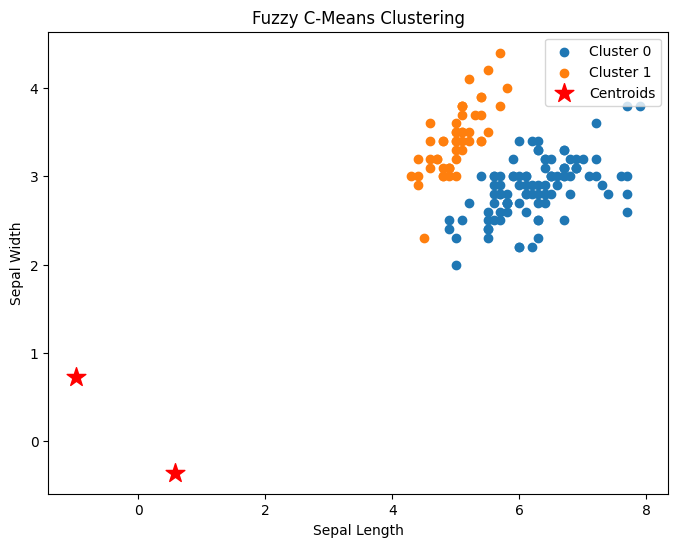

In [11]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['cluster_fcm'] == cluster]
    plt.scatter(cluster_data['sepal_length'], cluster_data['sepal_width'], label=f'Cluster {cluster}')

plt.scatter(fcm.centers[:, 0], fcm.centers[:, 1], s=200, c='red', marker='*', label='Centroids') # Use fcm.centers for centroids
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Fuzzy C-Means Clustering')
plt.legend()
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture



In [13]:
data = pd.read_csv("/content/IRIS (2).csv")

In [14]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = data[features]


In [16]:
n_components_range = range(1, 10)
lowest_bic = np.inf # Changed np.infty to np.inf
optimal_n_components = 0

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X)
    bic = gmm.bic(X)
    if bic < lowest_bic:
        lowest_bic = bic
        optimal_n_components = n_components

print(f"Optimal number of clusters (based on BIC): {optimal_n_components}")

Optimal number of clusters (based on BIC): 2


In [17]:
gmm = GaussianMixture(n_components=optimal_n_components, covariance_type='full', random_state=0)
gmm.fit(X)


GaussianMixture(n_components=2, random_state=0)

In [18]:

labels = gmm.predict(X)


data['cluster_gmm'] = labels



In [19]:
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   cluster_gmm  
0            0  
1            0  
2            0  
3            0  
4            0  


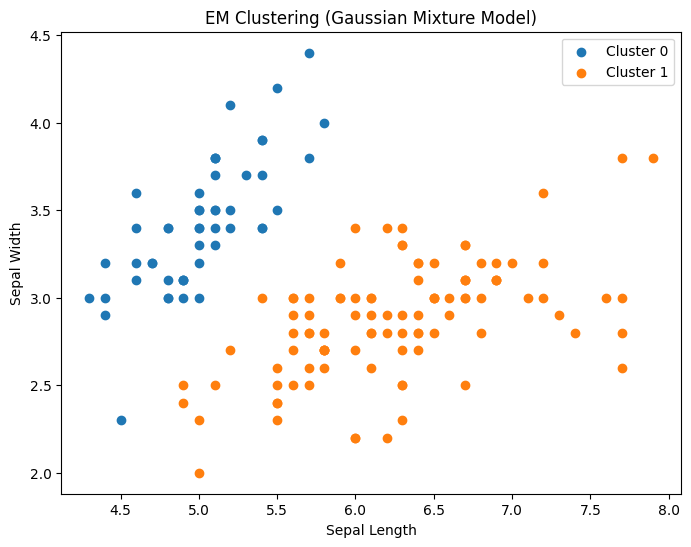

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster in range(optimal_n_components):
    cluster_data = data[data['cluster_gmm'] == cluster]
    plt.scatter(cluster_data['sepal_length'], cluster_data['sepal_width'], label=f'Cluster {cluster}')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('EM Clustering (Gaussian Mixture Model)')
plt.legend()
plt.show()
